In [1]:
from __future__ import print_function

import re
import sys
import numpy as np
from operator import add
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [2]:
from pyspark.sql.types import IntegerType
import math

In [4]:
spark = SparkSession\
      .builder\
        .appName("optimizers")\
        .getOrCreate()
df = spark.read.csv("winequality-red.csv",sep=';',header=True);
df.take(5)

[Row(fixed acidity=u'7.4', volatile acidity=u'0.7', citric acid=u'0', residual sugar=u'1.9', chlorides=u'0.076', free sulfur dioxide=u'11', total sulfur dioxide=u'34', density=u'0.9978', pH=u'3.51', sulphates=u'0.56', alcohol=u'9.4', quality=u'5'),
 Row(fixed acidity=u'7.8', volatile acidity=u'0.88', citric acid=u'0', residual sugar=u'2.6', chlorides=u'0.098', free sulfur dioxide=u'25', total sulfur dioxide=u'67', density=u'0.9968', pH=u'3.2', sulphates=u'0.68', alcohol=u'9.8', quality=u'5'),
 Row(fixed acidity=u'7.8', volatile acidity=u'0.76', citric acid=u'0.04', residual sugar=u'2.3', chlorides=u'0.092', free sulfur dioxide=u'15', total sulfur dioxide=u'54', density=u'0.997', pH=u'3.26', sulphates=u'0.65', alcohol=u'9.8', quality=u'5'),
 Row(fixed acidity=u'11.2', volatile acidity=u'0.28', citric acid=u'0.56', residual sugar=u'1.9', chlorides=u'0.075', free sulfur dioxide=u'17', total sulfur dioxide=u'60', density=u'0.998', pH=u'3.16', sulphates=u'0.58', alcohol=u'9.8', quality=u'6'

In [5]:
for i in df.columns:
    df = df.withColumn(i, df[i].cast('float'))

In [97]:
df.collect()

[Row(fixed acidity=7.0, volatile acidity=0.0, citric acid=0.0, residual sugar=1.0, chlorides=0.0, free sulfur dioxide=11.0, total sulfur dioxide=34.0, density=0.0, pH=3.0, sulphates=0.0, alcohol=9.0, quality=5.0),
 Row(fixed acidity=7.0, volatile acidity=0.0, citric acid=0.0, residual sugar=2.0, chlorides=0.0, free sulfur dioxide=25.0, total sulfur dioxide=67.0, density=0.0, pH=3.0, sulphates=0.0, alcohol=9.0, quality=5.0),
 Row(fixed acidity=7.0, volatile acidity=0.0, citric acid=0.0, residual sugar=2.0, chlorides=0.0, free sulfur dioxide=15.0, total sulfur dioxide=54.0, density=0.0, pH=3.0, sulphates=0.0, alcohol=9.0, quality=5.0),
 Row(fixed acidity=11.0, volatile acidity=0.0, citric acid=0.0, residual sugar=1.0, chlorides=0.0, free sulfur dioxide=17.0, total sulfur dioxide=60.0, density=0.0, pH=3.0, sulphates=0.0, alcohol=9.0, quality=6.0),
 Row(fixed acidity=7.0, volatile acidity=0.0, citric acid=0.0, residual sugar=1.0, chlorides=0.0, free sulfur dioxide=11.0, total sulfur dioxid

In [103]:
df.mapPartitions(lambda partition: f(partition))

PythonRDD[187] at RDD at PythonRDD.scala:53

In [6]:
def f(partition,theta,m):
    for sample in partition:
        j=1;
        sum1=theta[0];
        at=[theta[0]]
        for i in sample:
            if(j<len(theta)):
                sum1+=i*theta[j]
            else:
                sum1-=i;
            j+=1
        #print('grad: '+str(sum1))
        #print((sum1*sample)/m)
        yield((sum1*sample)/m);
def f1(partition,theta,m):
    for sample in partition:
        j=1;
        sum1=theta[0];
        for i in sample:
            if(j<len(theta)):
                sum1+=i*theta[j]
            else:
                sum1-=i;
            j+=1
        #print('loss: '+str(sum1))
        yield((sum1*sum1)/(2*m))

[ 13496755.45809881]
0
[ 1726687.38381051]
1
[ 225237.06222467]
2
[ 31845.89235591]
3
[ 6277.77325703]
4
[ 2666.07684904]
5
[ 2076.66377258]
6
[ 1954.99857837]
7
[ 1922.71653462]
8
[ 1912.47853165]
9
[ 1908.85149583]
10
[ 1907.42240883]
11
[ 1906.75658403]
12
[ 1906.36027866]
13
[ 1906.05977333]
14
[ 1905.79344717]
15
[ 1905.53937819]
16
[ 1905.28975938]
17
[ 1905.04180937]
18
[ 1904.79453718]
19
[ 1904.54758967]
20
[ 1904.30084103]
21
[ 1904.05424643]
22
[ 1903.80778991]
23
[ 1903.56146578]
24
[ 1903.31527203]
25
[ 1903.06920793]
26
[ 1902.82327325]
27
[ 1902.5774679]
28
[ 1902.33179187]
29
[ 1902.08624514]
30
[ 1901.84082772]
31
[ 1901.59553963]
32
[ 1901.35038087]
33
[ 1901.10535145]
34
[ 1900.86045139]
35
[ 1900.61568068]
36
[ 1900.37103936]
37
[ 1900.12652741]
38
[ 1899.88214487]
39
[ 1899.63789172]
40
[ 1899.39376799]
41
[ 1899.14977368]
42
[ 1898.90590881]
43
[ 1898.66217339]
44
[ 1898.41856742]
45
[ 1898.17509092]
46
[ 1897.93174389]
47
[ 1897.68852635]
48
[ 1897.4454383]
49
[ 

[ 1820.78787487]
397
[ 1820.59061438]
398
[ 1820.39348703]
399
[ 1820.19649283]
400
[ 1819.9996318]
401
[ 1819.80290394]
402
[ 1819.60630928]
403
[ 1819.4098478]
404
[ 1819.21351954]
405
[ 1819.01732449]
406
[ 1818.82126268]
407
[ 1818.6253341]
408
[ 1818.42953878]
409
[ 1818.23387671]
410
[ 1818.03834792]
411
[ 1817.8429524]
412
[ 1817.64769018]
413
[ 1817.45256127]
414
[ 1817.25756566]
415
[ 1817.06270339]
416
[ 1816.86797444]
417
[ 1816.67337884]
418
[ 1816.4789166]
419
[ 1816.28458773]
420
[ 1816.09039223]
421
[ 1815.89633012]
422
[ 1815.70240141]
423
[ 1815.50860611]
424
[ 1815.31494423]
425
[ 1815.12141577]
426
[ 1814.92802076]
427
[ 1814.7347592]
428
[ 1814.54163111]
429
[ 1814.34863648]
430
[ 1814.15577534]
431
[ 1813.9630477]
432
[ 1813.77045356]
433
[ 1813.57799293]
434
[ 1813.38566583]
435
[ 1813.19347227]
436
[ 1813.00141225]
437
[ 1812.80948579]
438
[ 1812.6176929]
439
[ 1812.42603359]
440
[ 1812.23450787]
441
[ 1812.04311575]
442
[ 1811.85185723]
443
[ 1811.66073235]
444


[ 1753.77176922]
789
[ 1753.62752183]
790
[ 1753.48341182]
791
[ 1753.33943918]
792
[ 1753.19560392]
793
[ 1753.05190607]
794
[ 1752.90834563]
795
[ 1752.7649226]
796
[ 1752.62163701]
797
[ 1752.47848886]
798
[ 1752.33547817]
799
[ 1752.19260493]
800
[ 1752.04986918]
801
[ 1751.90727091]
802
[ 1751.76481014]
803
[ 1751.62248687]
804
[ 1751.48030113]
805
[ 1751.33825292]
806
[ 1751.19634224]
807
[ 1751.05456912]
808
[ 1750.91293357]
809
[ 1750.77143558]
810
[ 1750.63007518]
811
[ 1750.48885238]
812
[ 1750.34776719]
813
[ 1750.20681961]
814
[ 1750.06600967]
815
[ 1749.92533736]
816
[ 1749.7848027]
817
[ 1749.64440571]
818
[ 1749.50414639]
819
[ 1749.36402475]
820
[ 1749.22404081]
821
[ 1749.08419457]
822
[ 1748.94448605]
823
[ 1748.80491526]
824
[ 1748.66548221]
825
[ 1748.52618691]
826
[ 1748.38702936]
827
[ 1748.2480096]
828
[ 1748.10912761]
829
[ 1747.97038342]
830
[ 1747.83177703]
831
[ 1747.69330846]
832
[ 1747.55497771]
833
[ 1747.4167848]
834
[ 1747.27872975]
835
[ 1747.14081255]


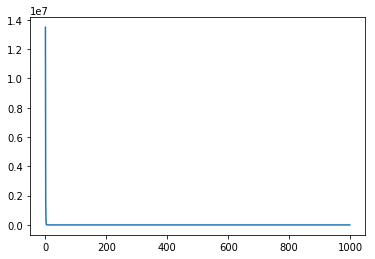

In [82]:
#Parelled SGD
theta=np.zeros((len(df.columns),1));
den=df.count();
progress=[]
for i in range(1000):
    tmp=df.rdd.mapPartitions(lambda partition: f1(partition,theta,den)).treeReduce(add);
    grads=df.rdd.mapPartitions(lambda partition:f(partition,theta,den)).treeReduce(add);
    #print(grads)
    for j in range(len(theta)):
        theta[j]=theta[j]-0.000001*grads[j]
    progress.append(tmp)
    print(tmp)
    print(i)
plt.figure()
plt.plot(progress)

[ 13496755.45809881]
0
[ 13065901.64666389]
1
[ 12642236.01183644]
2
[ 12225880.15468547]
3
[ 11816949.38725306]
4
[ 11415552.26392414]
5
[ 11021790.13931041]
6
[ 10635756.7560419]
7
[ 10257537.86553442]
8
[ 9887210.88443779]
9
[ 9524844.5890739]
10
[ 9170498.84973339]
11
[ 8824224.40630861]
12
[ 8486062.68624589]
13
[ 8156045.66541184]
14
[ 7834195.77201348]
15
[ 7520525.8333121]
16
[ 7215039.06448777]
17
[ 6917729.09865414]
18
[ 6628580.05669366]
19
[ 6347566.65530897]
20
[ 6074654.35142685]
21
[ 5809799.52088692]
22
[ 5552949.66917702]
23
[ 5304043.67184443]
24
[ 5063012.0421229]
25
[ 4829777.22324701]
26
[ 4604253.90291095]
27
[ 4386349.34731688]
28
[ 4175963.75230327]
29
[ 3972990.60907694]
30
[ 3777317.0821567]
31
[ 3588824.39721406]
32
[ 3407388.23660034]
33
[ 3232879.14045368]
34
[ 3065162.91139394]
35
[ 2904101.02093857]
36
[ 2749551.01588523]
37
[ 2601366.92303357]
38
[ 2459399.65073734]
39
[ 2323497.38589361]
40
[ 2193505.98509189]
41
[ 2069269.35875108]
42
[ 1950629.8471806

[ 11398.40266158]
373
[ 11398.96392653]
374
[ 11399.52612834]
375
[ 11400.08926353]
376
[ 11400.65332881]
377
[ 11401.21832113]
378
[ 11401.78423765]
379
[ 11402.35107574]
380
[ 11402.91883298]
381
[ 11403.48750715]
382
[ 11404.05709624]
383
[ 11404.62759841]
384
[ 11405.19901202]
385
[ 11405.77133558]
386
[ 11406.34456778]
387
[ 11406.91870748]
388
[ 11407.49375365]
389
[ 11408.06970543]
390
[ 11408.64656207]
391
[ 11409.22432296]
392
[ 11409.80298757]
393
[ 11410.38255549]
394
[ 11410.96302641]
395
[ 11411.54440009]
396
[ 11412.12667635]
397
[ 11412.70985512]
398
[ 11413.29393635]
399
[ 11413.87892006]
400
[ 11414.4648063]
401
[ 11415.05159518]
402
[ 11415.63928682]
403
[ 11416.22788139]
404
[ 11416.81737905]
405
[ 11417.40777999]
406
[ 11417.99908441]
407
[ 11418.59129252]
408
[ 11419.18440452]
409
[ 11419.77842062]
410
[ 11420.37334102]
411
[ 11420.96916591]
412
[ 11421.56589546]
413
[ 11422.16352985]
414
[ 11422.76206922]
415
[ 11423.36151372]
416
[ 11423.96186346]
417
[ 11424.563

[ 11671.84446329]
748
[ 11672.74222997]
749
[ 11673.64090763]
750
[ 11674.54049649]
751
[ 11675.44099677]
752
[ 11676.34240868]
753
[ 11677.24473245]
754
[ 11678.1479683]
755
[ 11679.05211644]
756
[ 11679.9571771]
757
[ 11680.86315051]
758
[ 11681.77003688]
759
[ 11682.67783644]
760
[ 11683.58654942]
761
[ 11684.49617605]
762
[ 11685.40671654]
763
[ 11686.31817114]
764
[ 11687.23054006]
765
[ 11688.14382354]
766
[ 11689.05802182]
767
[ 11689.97313511]
768
[ 11690.88916366]
769
[ 11691.8061077]
770
[ 11692.72396747]
771
[ 11693.64274319]
772
[ 11694.56243511]
773
[ 11695.48304346]
774
[ 11696.40456849]
775
[ 11697.32701042]
776
[ 11698.2503695]
777
[ 11699.17464598]
778
[ 11700.09984009]
779
[ 11701.02595207]
780
[ 11701.95298217]
781
[ 11702.88093064]
782
[ 11703.80979771]
783
[ 11704.73958364]
784
[ 11705.67028867]
785
[ 11706.60191304]
786
[ 11707.53445702]
787
[ 11708.46792084]
788
[ 11709.40230476]
789
[ 11710.33760903]
790
[ 11711.2738339]
791
[ 11712.21097962]
792
[ 11713.1490464

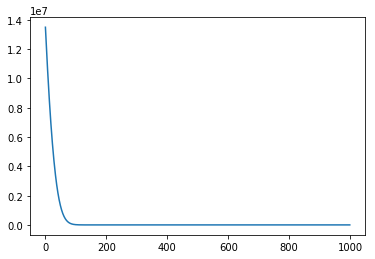

In [20]:
#Adam
theta=np.zeros((len(df.columns),1));
den=df.count();
alpha=0.001
beta_1=0.9;
beta_2=0.999;
eps=1e-8;
m_t=np.zeros((len(df.columns),1),dtype=float);
v_t=np.zeros((len(df.columns),1),dtype=float);
progress=[]
for i in range(1000):
    tmp=df.rdd.mapPartitions(lambda partition: f1(partition,theta,den)).treeReduce(add);
    grads=df.rdd.mapPartitions(lambda partition:f(partition,theta,den)).treeReduce(add);
    grads=grads.reshape(len(df.columns),1)
    m_t=beta_1*m_t+(1-beta_1)*grads;
    v_t=(beta_2)*v_t+(1-beta_2)*(grads*grads);
    mcap_t=m_t/(1-math.pow(beta_1,float(i+1)));
    vcap_t=v_t/(1-math.pow(beta_2,float(i+1)));
    progress.append(tmp)
    #print(mcap_t.shape)
    print(tmp)
    for j in range(len(theta)):
        tmp=alpha*(mcap_t[j]/(math.sqrt(vcap_t[j])+eps));
        theta[j]=theta[j]-tmp
    
    
    print(i)
plt.figure()
plt.plot(progress)

[ 13496755.45809881]
0
[ 34727616.20387134]
1
[ 4987388.47336456]
2
[ 471968.61159432]
3
[ 49975.99966811]
4
[ 5108.89616679]
5
[ 2591.92807189]
6
[ 1850.82144023]
7
[ 1936.02586197]
8
[ 1896.30452337]
9
[ 1906.56217605]
10
[ 1902.66605236]
11
[ 1903.19364503]
12
[ 1902.38110688]
13
[ 1901.97923056]
14
[ 1901.45277394]
15
[ 1900.96504729]
16
[ 1900.46619261]
17
[ 1899.97142871]
18
[ 1899.47611005]
19
[ 1898.98165481]
20
[ 1898.48763018]
21
[ 1897.99416839]
22
[ 1897.5012292]
23
[ 1897.008825]
24
[ 1896.51695212]
25
[ 1896.02561178]
26
[ 1895.53480373]
27
[ 1895.04452816]
28
[ 1894.55478513]
29
[ 1894.06557471]
30
[ 1893.57689701]
31
[ 1893.0887521]
32
[ 1892.60114007]
33
[ 1892.11406101]
34
[ 1891.627515]
35
[ 1891.14150213]
36
[ 1890.65602248]
37
[ 1890.17107614]
38
[ 1889.6866632]
39
[ 1889.20278373]
40
[ 1888.71943783]
41
[ 1888.23662559]
42
[ 1887.75434708]
43
[ 1887.27260239]
44
[ 1886.79139161]
45
[ 1886.31071482]
46
[ 1885.83057212]
47
[ 1885.35096358]
48
[ 1884.8718893]
49
[ 18

[ 1751.21464507]
397
[ 1750.92737722]
398
[ 1750.64067462]
399
[ 1750.35453735]
400
[ 1750.06896553]
401
[ 1749.78395922]
402
[ 1749.49951853]
403
[ 1749.21564355]
404
[ 1748.93233436]
405
[ 1748.64959107]
406
[ 1748.36741375]
407
[ 1748.08580251]
408
[ 1747.80475743]
409
[ 1747.52427861]
410
[ 1747.24436614]
411
[ 1746.9650201]
412
[ 1746.6862406]
413
[ 1746.40802772]
414
[ 1746.13038155]
415
[ 1745.85330219]
416
[ 1745.57678972]
417
[ 1745.30084424]
418
[ 1745.02546584]
419
[ 1744.75065462]
420
[ 1744.47641066]
421
[ 1744.20273405]
422
[ 1743.92962489]
423
[ 1743.65708327]
424
[ 1743.38510928]
425
[ 1743.11370302]
426
[ 1742.84286457]
427
[ 1742.57259402]
428
[ 1742.30289147]
429
[ 1742.03375701]
430
[ 1741.76519074]
431
[ 1741.49719273]
432
[ 1741.2297631]
433
[ 1740.96290192]
434
[ 1740.69660929]
435
[ 1740.4308853]
436
[ 1740.16573004]
437
[ 1739.90114361]
438
[ 1739.6371261]
439
[ 1739.3736776]
440
[ 1739.1107982]
441
[ 1738.84848799]
442
[ 1738.58674707]
443
[ 1738.32557552]
444

[ 1682.79188999]
790
[ 1682.73396954]
791
[ 1682.67665154]
792
[ 1682.61993607]
793
[ 1682.56382323]
794
[ 1682.50831313]
795
[ 1682.45340586]
796
[ 1682.39910152]
797
[ 1682.34540021]
798
[ 1682.29230203]
799
[ 1682.23980707]
800
[ 1682.18791543]
801
[ 1682.13662721]
802
[ 1682.0859425]
803
[ 1682.03586142]
804
[ 1681.98638405]
805
[ 1681.93751049]
806
[ 1681.88924085]
807
[ 1681.84157521]
808
[ 1681.79451368]
809
[ 1681.74805635]
810
[ 1681.70220333]
811
[ 1681.65695472]
812
[ 1681.6123106]
813
[ 1681.56827108]
814
[ 1681.52483626]
815
[ 1681.48200624]
816
[ 1681.43978111]
817
[ 1681.39816097]
818
[ 1681.35714592]
819
[ 1681.31673606]
820
[ 1681.27693149]
821
[ 1681.23773231]
822
[ 1681.19913861]
823
[ 1681.1611505]
824
[ 1681.12376806]
825
[ 1681.08699141]
826
[ 1681.05082064]
827
[ 1681.01525584]
828
[ 1680.98029712]
829
[ 1680.94594458]
830
[ 1680.91219831]
831
[ 1680.87905841]
832
[ 1680.84652498]
833
[ 1680.81459812]
834
[ 1680.78327793]
835
[ 1680.7525645]
836
[ 1680.72245794]


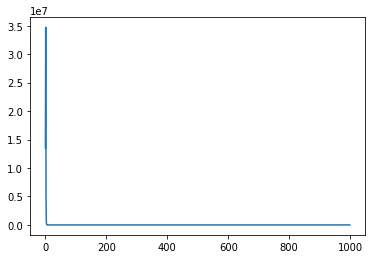

In [105]:
#AdaGrad
theta=np.zeros((len(df.columns),1));
den=df.count();
eta=0.9
eps=1e-8;
Gt=np.zeros((1,len(df.columns)));
progress=[]
for i in range(1000):
    tmp=df.rdd.mapPartitions(lambda partition: f1(partition,theta,den)).treeReduce(add);
    grads=df.rdd.mapPartitions(lambda partition:f(partition,theta,den)).treeReduce(add);
    grads=grads.reshape(len(df.columns),1)
    Gt=Gt+np.sum((grads*grads),axis=0);
    progress.append(tmp)
    #print(mcap_t.shape)
    print(tmp)
    for j in range(len(theta)):
        tmp=(eta*grads[j])/(math.sqrt(Gt[0][j]+eps));
        theta[j]=theta[j]-tmp;
    
    
    print(i)
plt.figure()
plt.plot(progress)

[ 13496755.45809881]
0
[ 10536541.83081758]
1
[ 8754148.90210135]
2
[ 7459904.08656928]
3
[ 6446092.61930612]
4
[ 5618517.73118461]
5
[ 4925335.51404913]
6
[ 4334510.10980662]
7
[ 3824644.64127713]
8
[ 3380622.42396931]
9
[ 2991298.41381364]
10
[ 2648175.03708651]
11
[ 2344594.52988861]
12
[ 2075221.65379622]
13
[ 1835698.94227515]
14
[ 1622409.22049746]
15
[ 1432307.40612264]
16
[ 1262798.52141427]
17
[ 1111647.39637001]
18
[ 976910.6355357]
19
[ 856884.55945667]
20
[ 750064.82351407]
21
[ 655114.71440552]
22
[ 570839.98957084]
23
[ 496168.71366381]
24
[ 430134.95451379]
25
[ 371865.48908078]
26
[ 320568.87632183]
27
[ 275526.40397811]
28
[ 236084.52695083]
29
[ 201648.49762418]
30
[ 171676.95110984]
31
[ 145677.25644305]
32
[ 123201.48214753]
33
[ 103842.85408515]
34
[ 87232.60711187]
35
[ 73037.15121489]
36
[ 60955.48855179]
37
[ 50716.8309023]
38
[ 42078.37801927]
39
[ 34823.2266159]
40
[ 28758.38752347]
41
[ 23712.89509618]
42
[ 19535.99836426]
43
[ 16095.42784949]
44
[ 13275.7354

[ 5145.23101989]
393
[ 3111.9246759]
394
[ 5118.15514278]
395
[ 3076.0035296]
396
[ 5051.62030257]
397
[ 3024.5864158]
398
[ 4977.09515891]
399
[ 2978.48297316]
400
[ 4923.80048093]
401
[ 2952.73953806]
402
[ 4908.6564885]
403
[ 2953.07454762]
404
[ 4933.44666249]
405
[ 2975.99769633]
406
[ 4986.27372431]
407
[ 3010.59482597]
408
[ 5045.87778242]
409
[ 3042.016303]
410
[ 5089.16382035]
411
[ 3057.07291629]
412
[ 5100.65014362]
413
[ 3050.05705249]
414
[ 5079.14096027]
415
[ 3025.03912302]
416
[ 5037.11635704]
417
[ 2992.94381487]
418
[ 4993.55292409]
419
[ 2965.83844166]
420
[ 4965.31811091]
421
[ 2952.15278374]
422
[ 4961.46699057]
423
[ 2954.47972683]
424
[ 4981.40830819]
425
[ 2969.56877878]
426
[ 5016.1268796]
427
[ 2989.8465137]
428
[ 5051.77271352]
429
[ 3006.22345265]
430
[ 5074.97443454]
431
[ 3011.66314671]
432
[ 5078.19753671]
433
[ 3004.05436006]
434
[ 5062.56035771]
435
[ 2986.75621601]
436
[ 5036.55510961]
437
[ 2966.56174658]
438
[ 5011.67541549]
439
[ 2950.49058715]
440


[ 2624.50548129]
786
[ 5327.47698011]
787
[ 2622.97895075]
788
[ 5329.69689027]
789
[ 2621.45733581]
790
[ 5331.92249993]
791
[ 2619.94140034]
792
[ 5334.15518225]
793
[ 2618.43179888]
794
[ 5336.39586624]
795
[ 2616.92884023]
796
[ 5338.64472826]
797
[ 2615.43240547]
798
[ 5340.90119922]
799
[ 2613.94203632]
800
[ 5343.16425401]
801
[ 2612.45714354]
802
[ 5345.43284601]
803
[ 2610.97724448]
804
[ 5347.70630768]
805
[ 2609.50213678]
806
[ 5349.98456837]
807
[ 2608.0319486]
808
[ 5352.26812444]
809
[ 2606.56705853]
810
[ 5354.55779704]
811
[ 2605.10792837]
812
[ 5356.85439004]
813
[ 2603.65492086]
814
[ 5359.15838773]
815
[ 2602.2081729]
816
[ 5361.46980308]
817
[ 2600.76756701]
818
[ 5363.78821971]
819
[ 2599.33280204]
820
[ 5366.11299269]
821
[ 2597.90352667]
822
[ 5368.44351673]
823
[ 2596.47947868]
824
[ 5370.77945323]
825
[ 2595.06057679]
826
[ 5373.12083419]
827
[ 2593.64693475]
828
[ 5375.46801525]
829
[ 2592.23880005]
830
[ 5377.82151051]
831
[ 2590.836448]
832
[ 5380.18178316]


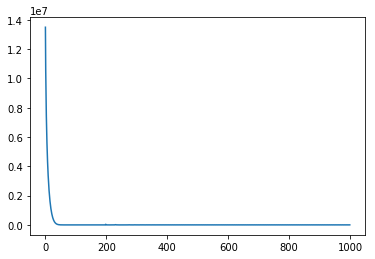

In [109]:
#AdaDelta
theta=np.zeros((len(df.columns),1));
den=df.count();
rho=0.95
eps=1e-6;
eta=0.009
EGt=np.zeros((1,len(df.columns)));
progress=[]
for i in range(1000):
    tmp=df.rdd.mapPartitions(lambda partition: f1(partition,theta,den)).treeReduce(add);
    grads=df.rdd.mapPartitions(lambda partition:f(partition,theta,den)).treeReduce(add);
    grads=grads.reshape(len(df.columns),1)
    EGt=rho*EGt+(1-rho)*np.sum((grads*grads),axis=0);
    progress.append(tmp)
    #print(mcap_t.shape)
    print(tmp)
    for j in range(len(theta)):
        tmp=(eta*grads[j])/(math.sqrt(EGt[0][j]+eps));
        theta[j]=theta[j]-tmp;
    
    
    print(i)
plt.figure()
plt.plot(progress)

[ 13496755.45809881]
0
[ 9502943.07723024]
1
[ 6460994.36570864]
2
[ 4202866.31985275]
3
[ 2579444.14378172]
4
[ 1460069.4617714]
5
[ 731829.11851242]
6
[ 298631.1294617]
7
[ 80099.19865386]
8
[ 10320.91512206]
9
[ 36487.14340177]
10
[ 117461.17070784]
11
[ 222315.85903311]
12
[ 328875.4332801]
13
[ 422295.73393649]
14
[ 493712.94312419]
15
[ 538986.16510049]
16
[ 557554.04362645]
17
[ 551420.0806639]
18
[ 524275.73575915]
19
[ 480764.97257974]
20
[ 425888.89309964]
21
[ 364544.64125642]
22
[ 301189.00545193]
23
[ 239614.19633943]
24
[ 182821.16936868]
25
[ 132974.60170876]
26
[ 91423.18037019]
27
[ 58769.13741131]
28
[ 34971.8762279]
29
[ 19471.94806353]
30
[ 11323.42740195]
31
[ 9324.76388358]
32
[ 12140.32711153]
33
[ 18406.99103503]
34
[ 26822.12486678]
35
[ 36211.18592174]
36
[ 45574.68624099]
37
[ 54115.59126069]
38
[ 61249.18797504]
39
[ 66598.13382808]
40
[ 69975.78381354]
41
[ 71361.02248491]
42
[ 70867.73932317]
43
[ 68711.82511408]
44
[ 65178.18058978]
45
[ 60589.76253359]
4

[ 11859.67156679]
379
[ 11861.59828542]
380
[ 11863.52720862]
381
[ 11865.45833982]
382
[ 11867.39168218]
383
[ 11869.32723867]
384
[ 11871.26501204]
385
[ 11873.20500484]
386
[ 11875.14721948]
387
[ 11877.09165821]
388
[ 11879.03832318]
389
[ 11880.98721646]
390
[ 11882.93834006]
391
[ 11884.89169593]
392
[ 11886.84728606]
393
[ 11888.8051124]
394
[ 11890.76517696]
395
[ 11892.72748179]
396
[ 11894.692029]
397
[ 11896.65882079]
398
[ 11898.62785941]
399
[ 11900.59914723]
400
[ 11902.5726867]
401
[ 11904.54848035]
402
[ 11906.52653083]
403
[ 11908.50684085]
404
[ 11910.48941322]
405
[ 11912.47425082]
406
[ 11914.46135661]
407
[ 11916.4507336]
408
[ 11918.44238487]
409
[ 11920.43631351]
410
[ 11922.43252268]
411
[ 11924.43101554]
412
[ 11926.43179529]
413
[ 11928.4348651]
414
[ 11930.44022819]
415
[ 11932.44788773]
416
[ 11934.4578469]
417
[ 11936.47010885]
418
[ 11938.48467673]
419
[ 11940.50155364]
420
[ 11942.52074268]
421
[ 11944.5422469]
422
[ 11946.56606934]
423
[ 11948.592213]
42

[ 12764.1435694]
754
[ 12767.12965119]
755
[ 12770.11931931]
756
[ 12773.11257864]
757
[ 12776.10943406]
758
[ 12779.10989048]
759
[ 12782.11395277]
760
[ 12785.12162587]
761
[ 12788.13291467]
762
[ 12791.1478241]
763
[ 12794.1663591]
764
[ 12797.18852461]
765
[ 12800.21432557]
766
[ 12803.24376693]
767
[ 12806.27685366]
768
[ 12809.31359073]
769
[ 12812.35398312]
770
[ 12815.39803582]
771
[ 12818.44575381]
772
[ 12821.49714211]
773
[ 12824.55220572]
774
[ 12827.61094966]
775
[ 12830.67337896]
776
[ 12833.73949865]
777
[ 12836.80931377]
778
[ 12839.88282938]
779
[ 12842.96005053]
780
[ 12846.0409823]
781
[ 12849.12562975]
782
[ 12852.21399796]
783
[ 12855.30609204]
784
[ 12858.40191707]
785
[ 12861.50147817]
786
[ 12864.60478045]
787
[ 12867.71182904]
788
[ 12870.82262906]
789
[ 12873.93718566]
790
[ 12877.05550399]
791
[ 12880.1775892]
792
[ 12883.30344645]
793
[ 12886.43308093]
794
[ 12889.5664978]
795
[ 12892.70370227]
796
[ 12895.84469953]
797
[ 12898.98949478]
798
[ 12902.13809325

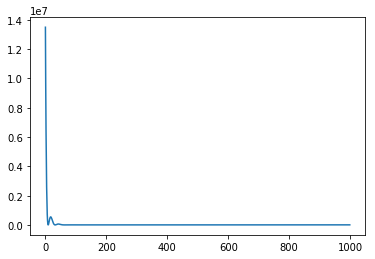

In [21]:
#AdaMax
theta=np.zeros((len(df.columns),1));
den=df.count();
alpha=0.00001
beta_1=0.9;
beta_2=0.999;
eps=1e-8;
m_t=np.zeros((len(df.columns),1),dtype=float);
v_t=np.zeros((len(df.columns),1),dtype=float);
progress=[]
for i in range(1000):
    tmp=df.rdd.mapPartitions(lambda partition: f1(partition,theta,den)).treeReduce(add);
    grads=df.rdd.mapPartitions(lambda partition:f(partition,theta,den)).treeReduce(add);
    grads=grads.reshape(len(df.columns),1)
    m_t=beta_1*m_t+(1-beta_1)*grads;
    v_t=np.maximum((beta_2)*v_t,(1-beta_2)*np.abs(grads));
        
    progress.append(tmp)
    #print(mcap_t.shape)
    print(tmp)
    for j in range(len(theta)):
        tmp=(alpha/(1-math.pow(beta_1,i+1)))*(m_t[j]/(v_t[j]));
        theta[j]=theta[j]-tmp;
    
    
    print(i)
plt.figure()
plt.plot(progress)

In [79]:
df1.collect()

[Row(fixed acidity=u'7.3', volatile acidity=u'0.45', citric acid=u'0.36', residual sugar=u'5.9', chlorides=u'0.074', free sulfur dioxide=u'12', total sulfur dioxide=u'87', density=u'0.9978', pH=u'3.33', sulphates=u'0.83', alcohol=u'10.5', quality=u'5'),
 Row(fixed acidity=u'8.8', volatile acidity=u'0.61', citric acid=u'0.3', residual sugar=u'2.8', chlorides=u'0.088', free sulfur dioxide=u'17', total sulfur dioxide=u'46', density=u'0.9976', pH=u'3.26', sulphates=u'0.51', alcohol=u'9.3', quality=u'4'),
 Row(fixed acidity=u'7.5', volatile acidity=u'0.49', citric acid=u'0.2', residual sugar=u'2.6', chlorides=u'0.332', free sulfur dioxide=u'8', total sulfur dioxide=u'14', density=u'0.9968', pH=u'3.21', sulphates=u'0.9', alcohol=u'10.5', quality=u'6'),
 Row(fixed acidity=u'8.1', volatile acidity=u'0.66', citric acid=u'0.22', residual sugar=u'2.2', chlorides=u'0.069', free sulfur dioxide=u'9', total sulfur dioxide=u'23', density=u'0.9968', pH=u'3.3', sulphates=u'1.2', alcohol=u'10.3', quality